# **Importing Necessary Packages**

In [36]:
import pandas as pd           #package for data analysis
import seaborn as sns         #package for data visualization
import neattext as nt         #package for text cleaning
from textblob import TextBlob #package for sentiment analysis

# **Reading the Data**

In [49]:
data=pd.read_excel('scrapped_data.xlsx')   #data reading wit help of pandas read_csv method

# **View of Data**

In [50]:
data.head() #top 5 records of our data

,comment,date,profile url,usersname
0,I like newsletters that tell me about new rele...,3 mo. ago,https://www.reddit.com/user/facebook57/,facebook57
1,Lol. I promise I’m just trying to find great n...,3 mo. ago,https://www.reddit.com/user/greyhound1296/,greyhound1296
2,Go on bandcamp and follow your favorite artist...,3 mo. ago,https://www.reddit.com/user/AnKoP/,AnKoP
3,"First Floor is the best it gets, IMO.",3 mo. ago,https://www.reddit.com/user/Nonomomomo2/,Nonomomomo2
4,Nice! And what do they usually send as a conte...,3 mo. ago,https://www.reddit.com/user/greyhound1296/,greyhound1296


# **Data Cleaning**

In [51]:
def text_cleaning(text):
    text=nt.remove_special_characters(text)  #removing special characters i.e #,@,!....
    text=nt.remove_emojis(text)               #remove emojis
    text=nt.fix_contractions(text)  #i.e I'm to I am
    text=text.lower()     #lower casing the text
    return text

In [52]:
data['comment']=data['comment'].apply(lambda x:text_cleaning(str(x))) #applying data cleanig

In [53]:
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity #calculating polarity of the sentence

In [54]:
data['polarity'] = data['comment'].apply(lambda x:getPolarity(x)) #getting polarity of comments

 what is sentence polarity: Sentence polarity is the amount of positive or negative sentiment in a sentence. Its value ranges between [-1,1]. As the polarity value approaches 1, a sentence considered more positive. similar sentence is considered negative if the polarity score tends towards -1 and considered neutral if the polarity score is 0.

In [55]:
 def getsentiment(polarity):
  if polarity < 0:     #sentiment is negative if polarity less than 0
    return 'Negative'
  elif polarity == 0:  #sentiment is neutal if polarity is equal to 0
    return 'Neutral'
  else:
    return 'Positive'  #sentiment is negative if polarity greater than 0

In [56]:
data['sentiment'] = data['polarity'].apply(lambda x:getsentiment(x))  #finding sentiment against sentence polarity

# **Data Visualization**

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

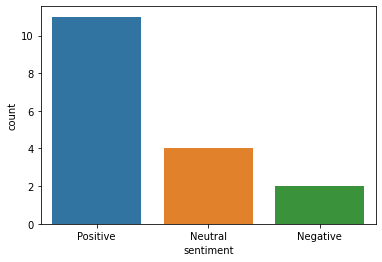

In [57]:
sns.countplot(data['sentiment'])   #distribution of sentiments

# **Saving the Results**

In [48]:
data[['comment','sentiment','polarity']].to_excel('comments_sentiment_analysis_data_revised.xlsx')